Добавим возможность автоматической проверки стиля кода PEP8
Подробности по ссылке:

https://stackoverflow.com/questions/26126853/verifying-pep8-in-ipython-notebook-code

In [1]:
%load_ext pycodestyle_magic

In [2]:
%pycodestyle_on

In [3]:
# Пример плохого кода
a=1

2:2: E225 missing whitespace around operator


In [4]:
# Пример плохого кода
if True:
   a = 1

3:4: E111 indentation is not a multiple of four


In [5]:
# Пример хорошего кода
if True:
    a = 1

## RDS 2.8 Итоговое задание

### Вводные данные:
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру. 

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

Для этого нужно построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы.

### Цель: 
построить модель, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы. 

### Задачи:

- Провести первичную обработку данных. 
- Посмотреть на распределение признака для числовых переменных, устранить выбросы.
- Оценить количество уникальных значений для номинативных переменных.
- По необходимости преобразовать данные.
- Провести корреляционный анализ количественных переменных.
- Отберать не коррелирующие переменные.
- Проанализировать номинативные переменные и устранить те, которые не влияют на предсказываемую величину.

---
### Описание датасета

Посмотрим на переменные, которые содержит датасет:

1. school — аббревиатура школы, в которой учится ученик
2. sex — пол ученика ('F' - женский, 'M' - мужской)
3. age — возраст ученика (от 15 до 22)
4. address — тип адреса ученика ('U' - городской, 'R' - за городом)
5. famsize — размер семьи('LE3' <= 3, 'GT3' >3)
6. Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)
7. Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
8. Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)
9. Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
10. Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)
11. reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)
12. guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)
13. traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)
14. studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)
15. failures — количество внеучебных неудач (n, если 1<=n<3, иначе 0)
16. schoolsup — дополнительная образовательная поддержка (yes или no)
17. famsup — семейная образовательная поддержка (yes или no)
18. paid — дополнительные платные занятия по математике (yes или no)
19. activities — дополнительные внеучебные занятия (yes или no)
20. nursery — посещал детский сад (yes или no)
21. higher — хочет получить высшее образование (yes или no)
22. internet — наличие интернета дома (yes или no)
23. romantic — в романтических отношениях (yes или no)
24. famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)
25. freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)
26. goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)
27. health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)
28. absences — количество пропущенных занятий
29. score — баллы по госэкзамену по математике

---
Подгрузим необходимые библиотеки

In [6]:
from itertools import combinations
from scipy.stats import ttest_ind
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

---
### Первичный анализ данных:
Загрузим датасет

In [7]:
df = pd.read_csv('stud_math.csv')

Посмотрим на первые пять строк данных

In [8]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,...,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,...,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,...,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,...,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,...,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0


Посмотрим на столбцы, которые содержит датасет:

In [9]:
df.columns.to_list()

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'studytime, granular',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'health',
 'absences',
 'score']

В датасете присутствуют 2 столбца с похожими названиями: 'studytime' и 'studytime, granular'. Посмотрим на их содержимое:

In [10]:
df['studytime'].value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [11]:
df['studytime, granular'].value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Сравним гистограммы:

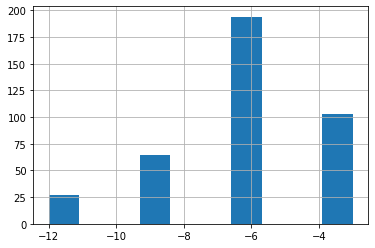

In [12]:
(df['studytime'] * -3).hist()

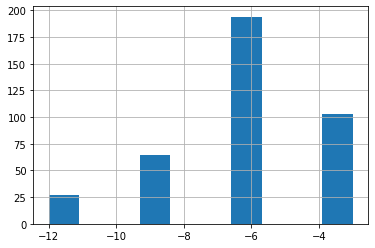

In [13]:
df['studytime, granular'].hist()

Видно, что 'studytime, granular' отличается от 'studytime' только тем, что все значения умножены на -3. Этот слобец не несет новой информации. Удалим его:

In [14]:
df.drop('studytime, granular', axis=1, inplace=True)

Переименуем столбцы так, чтобы с ними было удобно работать:

In [15]:
columns = [
    'school',
    'sex',
    'age',
    'address',
    'famsize',
    'pstatus',
    'medu',
    'fedu',
    'mjob',
    'fjob',
    'reason',
    'guardian',
    'traveltime',
    'studytime',
    'failures',
    'schoolsup',
    'famsup',
    'paid',
    'activities',
    'nursery',
    'higher',
    'internet',
    'romantic',
    'famrel',
    'freetime',
    'goout',
    'health',
    'absences',
    'score'
]

In [16]:
df.columns = columns

Посмотрим на типы данных

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      395 non-null    object 
 1   sex         395 non-null    object 
 2   age         395 non-null    int64  
 3   address     378 non-null    object 
 4   famsize     368 non-null    object 
 5   pstatus     350 non-null    object 
 6   medu        392 non-null    float64
 7   fedu        371 non-null    float64
 8   mjob        376 non-null    object 
 9   fjob        359 non-null    object 
 10  reason      378 non-null    object 
 11  guardian    364 non-null    object 
 12  traveltime  367 non-null    float64
 13  studytime   388 non-null    float64
 14  failures    373 non-null    float64
 15  schoolsup   386 non-null    object 
 16  famsup      356 non-null    object 
 17  paid        355 non-null    object 
 18  activities  381 non-null    object 
 19  nursery     379 non-null    o

С помощью простой функции, найдем данные с небольшим количеством уникальных значений (номинативные числовые и нечисловые переменные):

In [18]:
def find_nominatives(data):
    digital_nominatives = []
    non_digital_nominatives = []

    for column in data.columns:
        if column == 'failures':
            continue
        if data[column].nunique() <= 6:
            if data[column].dtype == 'O':
                non_digital_nominatives.append(column)
            else:
                digital_nominatives.append(column)

    print('Числовые номинативные переменные:')
    display(digital_nominatives)
    print()
    print('Нечисловые номинативные переменные:')
    display(non_digital_nominatives)

    return digital_nominatives, non_digital_nominatives

In [19]:
digital_nominatives, non_digital_nominatives = find_nominatives(df)

Числовые номинативные переменные:


['medu',
 'fedu',
 'traveltime',
 'studytime',
 'famrel',
 'freetime',
 'goout',
 'health']


Нечисловые номинативные переменные:


['school',
 'sex',
 'address',
 'famsize',
 'pstatus',
 'mjob',
 'fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

Создадим список числовых переменных:

In [20]:
digitals = ['age', 'absences', 'failures']

Зададим название целевой переменной:

### Выводы:
Из описания переменных, типов данных и количеств уникальных значений данных в переменных датасета следует, что:
1. Целевой переменной является score. Тип: числовая дискретная;
2. Из всех оставшихся переменных только age, absences и failures являются числовыми дискретными;
3. Переменные medu, fedu, traveltime, studytime, famrel, freetime, goout, health являются числовыми номинативными;
4. Переменные school, sex, address, famsize, pstatus, mjob, fjob, reason, guardian, schoolsup, famsup, paid, activities, nursery, higher, internet, romantic являются нечисловыми номинативными.

---
### Пропуски:
Оценим общую картину в отношении пропусков данных:

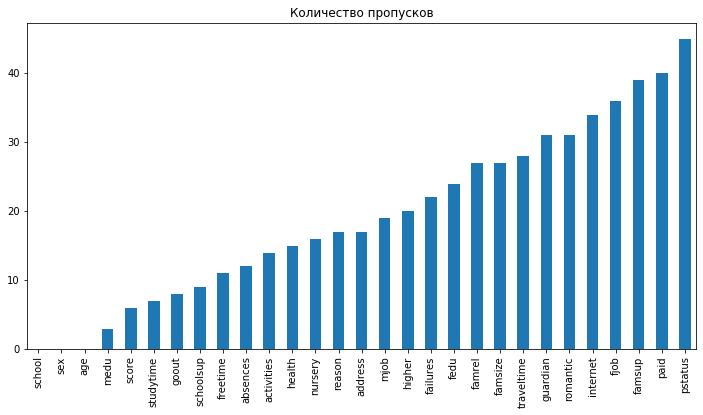

In [21]:
plt.figure(figsize=(12, 6))
df.isna().sum().sort_values().plot(kind='bar', title='Количество пропусков')

### Выводы:
1. Только переменные school, sex, age не содержат пропусков;
2. Целевая переменная score также содержит пропуски;
3. Устранение пропусков необходимо провести в отдельности по каждой переменной после более детального ознакомления с данными.

---
#### 1. school
Описание: аббревиатура школы, в которой учится ученик

Проверим пропуски:

In [22]:
df.school.isna().sum()

0

Все данные заполнены.

Определим количество уникальных значений:

In [23]:
df.school.nunique()

2

 Посмотрим на них:

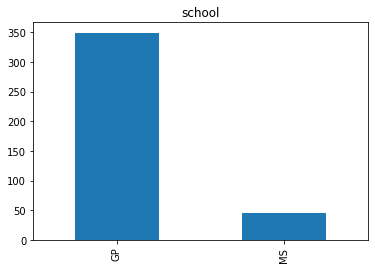

In [24]:
df.school.value_counts().plot(kind='bar', title='school')

#### Выводы:
1. Все данные school заполнены;
2. Всего 2 варианта значений: GP и MS;
3. Данных с GP значительно больше чем MS. Возможно потребуется применение одного из вариантов балансировки данных перед обучением модели;
4. Это категориальные данные, так что выбросов нет и не может быть.

---
#### 2. sex
Описание: пол ученика ('F' - женский, 'M' - мужской)

Проверим пропуски:

In [25]:
df.sex.isna().sum()

0

Все данные заполнены.

Определим количество уникальных значений:

In [26]:
df.sex.nunique()

2

 Посмотрим на них:

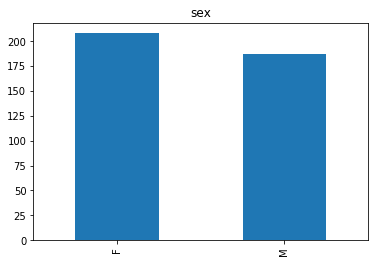

In [27]:
df.sex.value_counts().plot(kind='bar', title='sex')

#### Выводы:
1. Все данные sex заполнены;
2. Всего 2 варианта значений: F и M;
3. Данных с F незначительно больше чем M, таким образом по переменной sex данные можно считать относительно сбалансированными;
4. Это номинативные данные, варианты значений укладываются в логику переменной, выбросов нет.

Переведем данные в числовой формат для дальнейшего использования в модели:

---
#### 3. age
Описание: возраст ученика (от 15 до 22)

Проверим пропуски:

In [28]:
df.age.isna().sum()

0

Все данные заполнены.

Посмотрим на распределение значений:

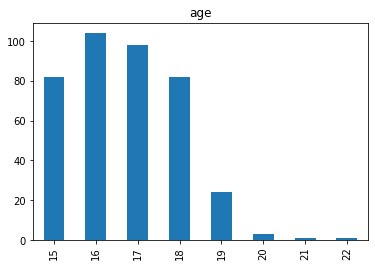

In [29]:
df.age.value_counts(sort=False).plot(kind='bar', title='age')

Посмотрим наглядно на наличие выбросов с помощью boxplot:

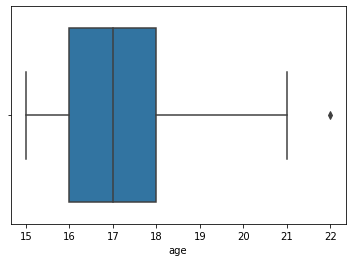

In [30]:
sns.boxplot(x='age', data=df)

Вывод: boxplot показал выброс на значении 22.

Проверим количество выбросов:

In [31]:
(df.age > 21).sum()

1

Вывод: такой выброс всего один.

### Выводы:

1. Все данные age заполнены;
2. Есть один выброс на значении 22;
3. Согласно описанию переменной значение 22 является допустимым. Данные с этим выбросом не удаляем.

---
#### 4. address
Описание: тип адреса ученика ('U' - городской, 'R' - за городом)

Проверим пропуски:

In [32]:
df.address.isna().sum()

17

Есть пропуски.

Определим количество уникальных значений:

In [33]:
df.address.nunique()

2

 Посмотрим на них:

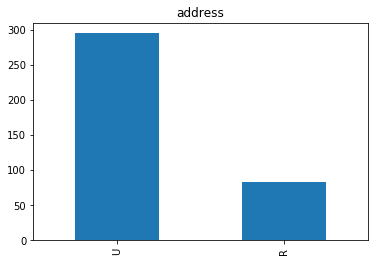

In [34]:
df.address.value_counts().plot(kind='bar', title='address')

Заполним пропуски наиболее часто встречающимся значением 'U'

In [35]:
df.address = df.address.fillna('U')

#### Выводы:
1. Не все данные address были заполнены;
2. Всего 2 варианта значений: U и R;
3. Данные с U встречаются значительно яаще чем с R. Возможно потребуется применение одного из вариантов балансировки данных перед обучением модели;
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутствующие данные заполнены наиболее часто встречающимся значением 'U'

---
#### 5. famsize
Описание: размер семьи('LE3' <= 3, 'GT3' >3)

Проверим пропуски:

In [36]:
df.famsize.isna().sum()

27

Есть пропуски.

Определим количество уникальных значений:

In [37]:
df.famsize.nunique()

2

 Посмотрим на них:

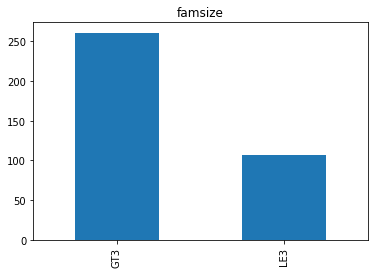

In [38]:
df.famsize.value_counts().plot(kind='bar', title='famsize')

Заменим пропуски наиболее часто встречающимся значением 'GT3':

In [39]:
df.famsize.fillna('GT3', inplace=True)

#### Выводы:
1. Не  все данные famsize заполнены
2. Всего 2 варианта значений: GT3 и LE3
3. Данных с GT3 значительно больше чем LE3
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутствующие данные заполнены наиболее часто встречающимся значением 'GT3'

---
#### 6. pstatus
Описание: статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

Проверим пропуски:

In [40]:
df.pstatus.isna().sum()

45

Есть пропуски.

Определим количество уникальных значений:

In [41]:
df.pstatus.nunique()

2

 Посмотрим на них:

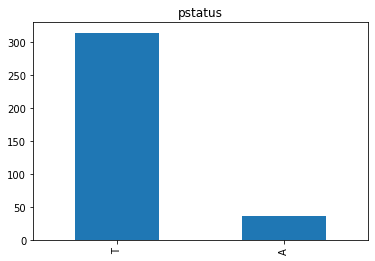

In [42]:
df.pstatus.value_counts().plot(kind='bar', title='pstatus')

Заполним отсутствующие данные наиболее часто встречающимся значением 'T':

In [43]:
df.pstatus.fillna('T', inplace=True)

#### Выводы:
1. Не  все данные Pstatus заполнены;
2. Всего 2 варианта значений: T и A;
3. Данных с T значительно больше чем A. Возможно потребуется балансировка данных одним из способов перед обучением модели;
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутствующие данные заполнены наиболее часто встречающимся значением 'T'.

---
#### 7. medu
Описание: образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Проверим пропуски:

In [44]:
df.medu.isna().sum()

3

Не все данные заполнены.

Посмотрим на распределение значений:

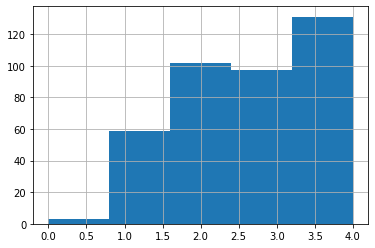

In [45]:
df.medu.hist(bins=len(df.medu.value_counts()))

Посмотрим наглядно на наличие выбросов с помощью boxplot:

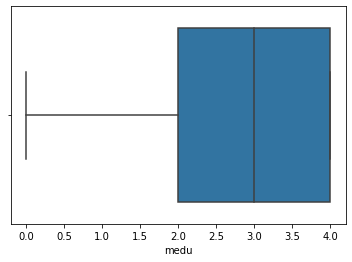

In [46]:
sns.boxplot(x='medu', data=df)

Вывод: выбросов нет.

Посмотрим на значения:

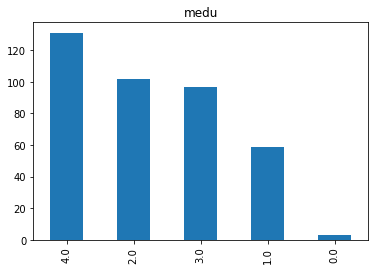

In [47]:
df.medu.value_counts().plot(kind='bar', title='medu')

Нет ярко выраженного преобладания какого-то значения над другими, так что в виду относительно небольшого количества пропусков соответствующие данные лучше удалить:

In [48]:
df.dropna(subset=['medu'], inplace=True)

### Выводы:
1. Не все данные заполнены;
2. Переменная medu являтся номинативной числовой;
3. Нет ярко выраженного преобладания одного значения над другими;
4. Отсутствующих данных относительно немного, так что лучше их удалить.

---
#### 8. fedu
Описание: образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

Проверим пропуски:

In [49]:
df.fedu.isna().sum()

24

Не все данные заполнены.

Посмотрим на распределение значений:

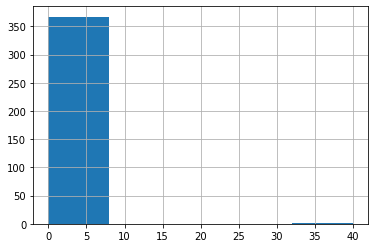

In [50]:
df.fedu.hist(bins=5)

Вывод: пока гистограмма неинформативна в виду наличия выбросов.

Посмотрим наглядно на наличие выбросов с помощью boxplot:

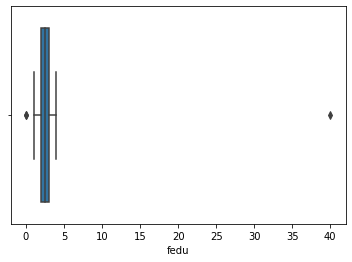

In [51]:
sns.boxplot(x='fedu', data=df)

Вывод: имеется явный выброс превышающий 4, которого не должно быть согласно описанию переменной fedu.

Посмотрим на значения:

In [52]:
df.fedu.value_counts()

2.0     105
3.0      95
4.0      88
1.0      77
0.0       2
40.0      1
Name: fedu, dtype: int64

Теперь мы видим, что есть один выброс на значении 40. Удалим соответствующую строку данных.

In [53]:
df = df[df.fedu != 40]

Посмотрим на гистограмму и boxplot еще раз:

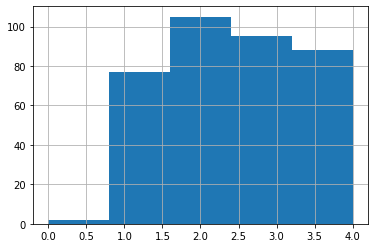

In [54]:
df.fedu.hist(bins=5)

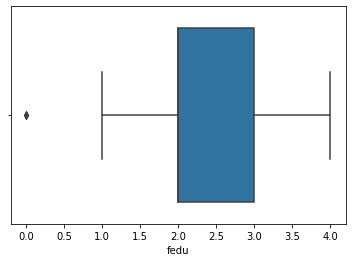

In [55]:
sns.boxplot(x='fedu', data=df)

Не смотря на математику принимаем решение оставить данные со значениями fedu равными 0, потому что они укладываются в диапазон возможных значений согласно описанию переменной.

Так как нет ярко выраженного преобладания одного значения переменной над другими, и в виду односительно большого количества пропусков, создадим дополнительную переменную fedu_was_nan, после чего заменим пропущенные данные наиболее часто встречающимся значением 2:

In [56]:
df['fedu_was_nan'] = df.fedu.isna()
df.fedu.fillna(2.0, inplace=True)

### Выводы:
1. Не все данные заполнены;
2. Переменная fedu являтся номинативной числовой;
3. Нет ярко выраженного преобладания одного значения над другими;
4. Имелся один выброс на значении 40, который лучше удалить;
5. Отсутствующих данных относительно много, так что лучше заполнить их наиболее часто встречающимся значением 2 и добавить переменную fedu_was_nan показывающую были ли отсутствующие данные в соответствующей строке fedu.

---
#### 9. mjob
Описание: работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Проверим пропуски:

In [57]:
df.mjob.isna().sum()

19

Есть пропуски.

Определим количество уникальных значений:

In [58]:
df.mjob.nunique()

5

 Посмотрим на них:

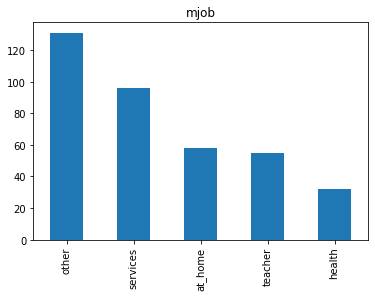

In [59]:
df.mjob.value_counts().plot(kind='bar', title='mjob')

Заполним пропуски данных наиболее часто встречающимся значнием 'other':

In [60]:
df.mjob.fillna('other', inplace=True)

#### Выводы:
1. Не  все данные mjob заполнены;
2. Всего 5 вариантов значений: other, services, at_home, teacher и health;
3. Данные с other встречаются чаще остальных;
4. Это номинативный признак;
5. Выбросов нет;
6. Лучше заменить отсутствующие данные наиболее часто встречающимся значением other.

---
#### 10. fjob
Описание: работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

Проверим пропуски:

In [61]:
df.fjob.isna().sum()

36

Есть пропуски.

Определим количество уникальных значений:

In [62]:
df.fjob.nunique()

5

 Посмотрим на них:

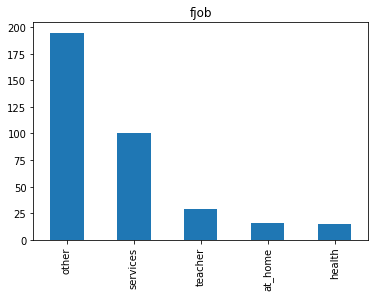

In [63]:
df.fjob.value_counts().plot(kind='bar', title='fjob')

Заполним пропуски данных наиболее часто встречающимся значнием 'other':

In [64]:
df.fjob.fillna('other', inplace=True)

#### Выводы:
1. Не  все данные fjob заполнены;
2. Всего 5 вариантов значений: other, services, at_home, teacher и health;
3. Данные с other встречаются чаще остальных;
4. Это номинативный признак;
5. Выбросов нет;
6. Лучше заменить отсутствующие данные наиболее часто встречающимся значением other.

---
#### 11. reason
Описание: причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

Проверим пропуски:

In [65]:
df.reason.isna().sum()

17

Есть пропуски.

Определим количество уникальных значений:

In [66]:
df.reason.nunique()

4

 Посмотрим на них:

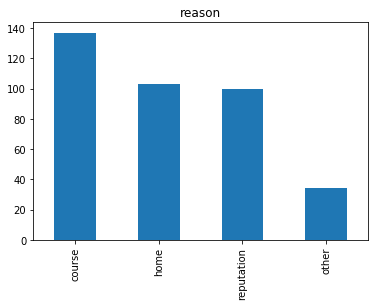

In [67]:
df.reason.value_counts().plot(kind='bar', title='reason')

Заполним пропуски наиболее часто встречающимся значением course:

In [68]:
df.reason.fillna('course', inplace=True)

#### Выводы:
1. Не  все данные reason заполнены;
2. Всего 4 вариана значений: course, home, reputation, other;
3. Данные с course встречаются чаще остальных;
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутствующие данные лучше заменить наиболее часто встречающимся значением course.

---
#### 12. guardian
Описание: опекун ('mother' - мать, 'father' - отец, 'other' - другое)

Проверим пропуски:

In [69]:
df.guardian.isna().sum()

31

Есть пропуски.

Определим количество уникальных значений:

In [70]:
df.guardian.nunique()

3

 Посмотрим на них:

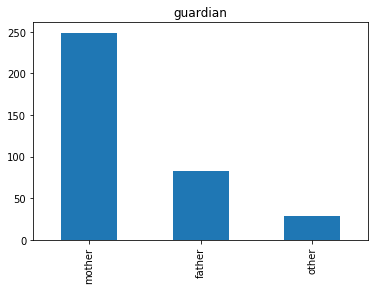

In [71]:
df.guardian.value_counts().plot(kind='bar', title='guardian')

Заполним пропуски наиболее часто встречающимся значением mother:

In [72]:
df.guardian.fillna('mother', inplace=True)

#### Выводы:
1. Не  все данные guardian заполнены;
2. Всего 3 вариана значений: mother, father, other;
3. Данные с mother встречаются значительно чаще остальных;
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутсвующие данные лучше заменить наиболее часто встречающимся значением mother.

---
#### 13. traveltime
время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

Проверим пропуски:

In [73]:
df.traveltime.isna().sum()

28

Не все данные заполнены.

Посмотрим на распределение значений:

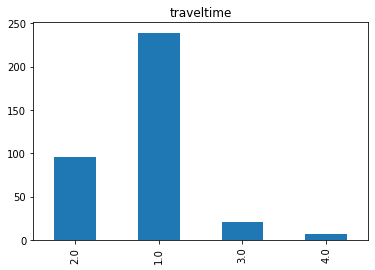

In [74]:
df.traveltime.value_counts(sort=False).plot(kind='bar', title='traveltime')

Посмотрим наглядно на наличие выбросов с помощью boxplot:

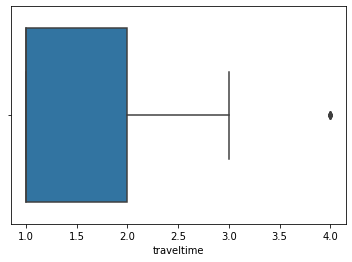

In [75]:
sns.boxplot(x='traveltime', data=df)

Согласно описанию, 4 является допустимым значением, так что считаем, что выбросов нет.

Посмотрим на значения:

In [76]:
df.traveltime.value_counts()

1.0    239
2.0     96
3.0     21
4.0      7
Name: traveltime, dtype: int64

Заменим пропущенные значения наиболее часто встречающимся значением 1:

In [77]:
df.traveltime = df.traveltime.fillna(1)

#### Выводы:
1. Не  все данные traveltime заполнены;
2. Всего 4 вариана значений: 1, 2, 3, 4;
3. Данные с 1 встречаются значительно чаще остальных;
4. Это номинативный числовой признак;
5. Выбросов нет;
6. Отсутсвующие данные лучше заменить наиболее часто встречающимся значением 1.

---
#### 14. studytime
Описание: время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

Проверим пропуски:

In [78]:
df.studytime.isna().sum()

7

Не все данные заполнены.

Посмотрим на распределение значений:

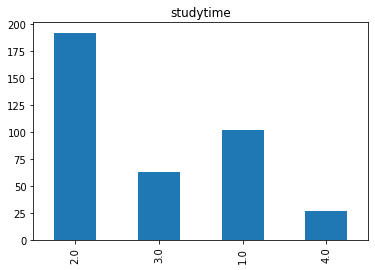

In [79]:
df.studytime.value_counts(sort=False).plot(kind='bar', title='studytime')

Вывод: наиболее часто встречается значение 2, однако сами значения таковы, что они скорее носят характер категориальных, нежели непрерывных числовых.

Посмотрим наглядно на наличие выбросов с помощью boxplot:

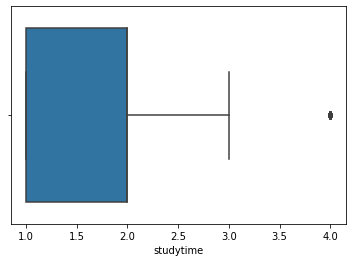

In [80]:
sns.boxplot(x='studytime', data=df)

Вывод: 4 - является допустимым значением, так что считаем, что выбросов нет.

Посмотрим на значения:

In [81]:
df.studytime.value_counts()

2.0    192
1.0    102
3.0     63
4.0     27
Name: studytime, dtype: int64

Заменим пропущенные значения наиболее часто встречающимся значением 2:

In [82]:
df.studytime = df.studytime.fillna(2)

#### Выводы:
1. Не  все данные studytime заполнены;
2. Всего 4 вариана значений: 1, 2, 3, 4;
3. Данные с 2 встречаются значительно чаще остальных;
4. Это номинативный числовой признак;
5. Выбросов нет;
6. Отсутсвующие данные лучше заменить наиболее часто встречающимся значением 2.

---
#### 15. failures
Описание: количество внеучебных неудач (n, если 1<=n<3, иначе 0)

Проверим пропуски:

In [83]:
df.failures.isna().sum()

22

Не все данные заполнены.

Посмотрим на распределение значений:

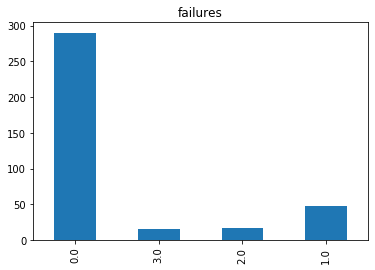

In [84]:
df.failures.value_counts(sort=False).plot(kind='bar', title='failures')

Вывод: наиболее часто встречается значение 0, однако сами значения таковы, что они скорее носят характер категориальных, нежели непрерывных числовых.

Посмотрим наглядно на наличие выбросов с помощью boxplot:

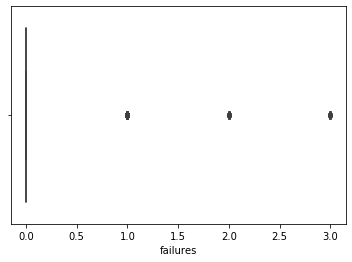

In [85]:
sns.boxplot(x='failures', data=df)

Вывод: 1, 2 и 3 - являются допустимыми значениями, так что считаем, что выбросов нет.

Посмотрим на значения:

In [86]:
df.failures.value_counts()

0.0    290
1.0     48
2.0     16
3.0     15
Name: failures, dtype: int64

Заменим пропущенные значения наиболее часто встречающимся значением 0:

In [87]:
df.failures = df.failures.fillna(0)

#### Выводы:
1. Не  все данные failures заполнены;
2. Всего 4 вариана значений: 0, 1, 2, 3;
3. Данные с 0 встречаются значительно чаще остальных;
4. Это номинативный числовой признак;
5. Выбросов нет;
6. Отсутсвующие данные лучше заменить наиболее часто встречающимся значением 0.

---
#### 16. schoolsup
Описание: дополнительная образовательная поддержка (yes или no)

Проверим пропуски:

In [88]:
df.schoolsup.isna().sum()

9

Не все данные заполнены.

Определим количество уникальных значений:

In [89]:
df.schoolsup.nunique()

2

 Посмотрим на них:

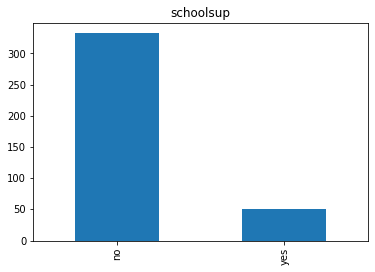

In [90]:
df.schoolsup.value_counts().plot(kind='bar', title='schoolsup')

Заменим пропущенные данные наиболее часто встречающимся значением no:

In [91]:
df.schoolsup.fillna('no', inplace=True)

#### Выводы:
1. Не  все данные schoolsup заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные с no встречаются значительно чаще;
4. Это категориальные номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением no.

---
#### 17. famsup
Описание: семейная образовательная поддержка (yes или no)

Проверим пропуски:

In [92]:
df.famsup.isna().sum()

39

Не все данные заполнены.

Определим количество уникальных значений:

In [93]:
df.famsup.nunique()

2

 Посмотрим на них:

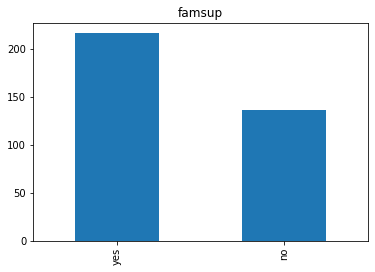

In [94]:
df.famsup.value_counts().plot(kind='bar', title='famsup')

Заменим пропущенные данные наиболее часто встречающимся значением yes:

In [95]:
df.famsup.fillna('yes', inplace=True)

#### Выводы:
1. Не  все данные famlsup заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные с yes встречаются значительно чаще;
4. Это категориальные номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением yes.

---
#### 18. paid
Описание: дополнительные платные занятия по математике (yes или no)

Проверим пропуски:

In [96]:
df.paid.isna().sum()

40

Не все данные заполнены.

Определим количество уникальных значений:

In [97]:
df.paid.nunique()

2

 Посмотрим на них:

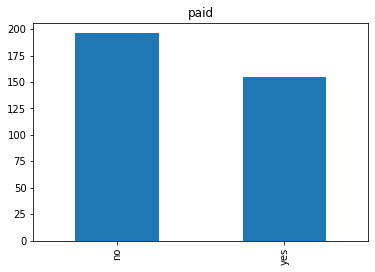

In [98]:
df.paid.value_counts().plot(kind='bar', title='paid')

Заменим пропущенные данные наиболее часто встречающимся значением no:

In [99]:
df.paid.fillna('no', inplace=True)

#### Выводы:
1. Не  все данные paid заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные с no встречаются значительно чаще;
4. Это категориальные номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением no.

---
#### 19. activities
Описание: дополнительные внеучебные занятия (yes или no)

Проверим пропуски:

In [100]:
df.activities.isna().sum()

14

Не все данные заполнены.

Определим количество уникальных значений:

In [101]:
df.activities.nunique()

2

 Посмотрим на них:

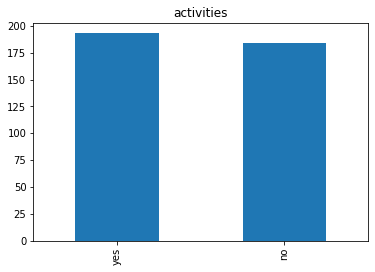

In [102]:
df.activities.value_counts().plot(kind='bar', title='activities')

Для выделения пропущенных данных заменим их значением other:

In [103]:
df.activities.fillna('other', inplace=True)

#### Выводы:
1. Не  все данные activities заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные практически сбалансировны;
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутствующие данные лучше заменить значением 'other'.

---
#### 20. nursery
Описание: посещал детский сад (yes или no)

Проверим пропуски:

In [104]:
df.nursery.isna().sum()

16

Не все данные заполнены.

Определим количество уникальных значений:

In [105]:
df.nursery.nunique()

2

 Посмотрим на них:

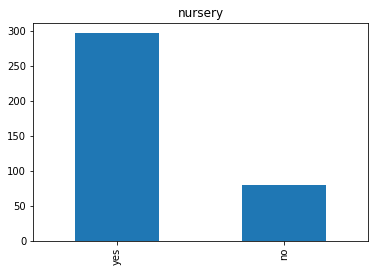

In [106]:
df.nursery.value_counts().plot(kind='bar', title='nursery')

Заменим пропущенные данные наиболее часто встречающимся значением yes:

In [107]:
df.nursery.fillna('yes', inplace=True)

#### Выводы:
1. Не  все данные nursery заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные с yes встречаются значительно чаще;
4. Это номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить значением yes.

---
#### 21. higher
Описание: очет получить высшее образование (yes или no)

Проверим пропуски:

In [108]:
df.higher.isna().sum()

20

Не все данные заполнены.

Определим количество уникальных значений:

In [109]:
df.higher.nunique()

2

 Посмотрим на них:

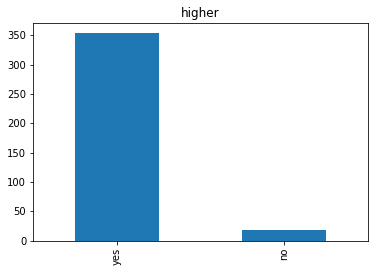

In [110]:
df.higher.value_counts().plot(kind='bar', title='higher')

Заменим пропущенные данные наиболее часто встречающимся значением yes:

In [111]:
df.higher.fillna('yes', inplace=True)

#### Выводы:
1. Не  все данные higher заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные с yes встречаются значительно чаще;
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутствующие данные лучше заменить наиболее часто встречающимся значением yes.

---
#### 22. internet
Описание: наличие интернета дома (yes или no)

Проверим пропуски:

In [112]:
df.internet.isna().sum()

33

Не все данные заполнены.

Определим количество уникальных значений:

In [113]:
df.internet.nunique()

2

 Посмотрим на них:

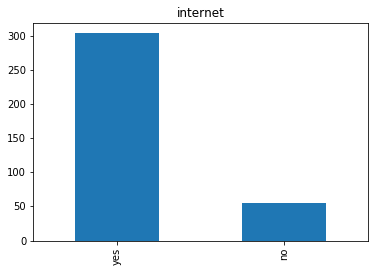

In [114]:
df.internet.value_counts().plot(kind='bar', title='internet')

Заменим пропущенные данные наиболее часто встречающимся значением yes:

In [115]:
df.internet.fillna('yes', inplace=True)

#### Выводы:
1. Не  все данные internet заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные с yes встречаются значительно чаще;
4. Это номинативный признак;
5. Выбросов нет;
6. Отсутствующие данные лучше заменить наиболее часто встречающимся значением yes.

---
#### 23. romantic
Описание: в романтических отношениях (yes или no)

Проверим пропуски:

In [116]:
df.romantic.isna().sum()

30

Не все данные заполнены.

Определим количество уникальных значений:

In [117]:
df.romantic.nunique()

2

 Посмотрим на них:

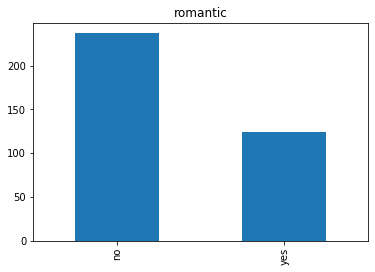

In [118]:
df.romantic.value_counts().plot(kind='bar', title='romantic')

Заменим пропущенные данные наиболее часто встречающимся значением no:

In [119]:
df.romantic.fillna('no', inplace=True)

#### Выводы:
1. Не  все данные romantic заполнены;
2. Всего 2 вариана значений: no, yes;
3. Данные с no встречаются значительно чаще;
4. Это номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением no.

---
#### 24. famrel
Описание: семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

Проверим пропуски:

In [120]:
df.famrel.isna().sum()

27

Не все данные заполнены.

Посмотрим на распределение значений:

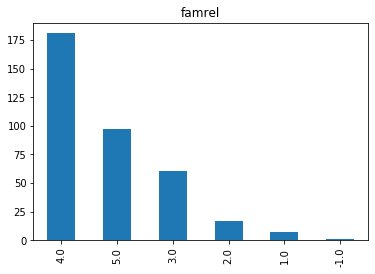

In [121]:
df.famrel.value_counts().plot(kind='bar', title='famrel')

Вывод: распределение смещено в сторону более высоких значений, однако сами значения таковы, что они скорее носят характер категориальных, нежели непрерывных числовых.

Посмотрим наглядно на наличие выбросов с помощью boxplot:

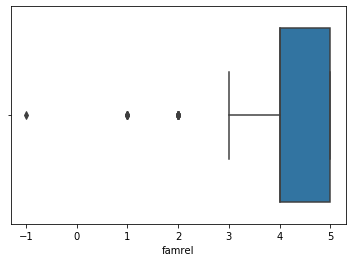

In [122]:
sns.boxplot(x='famrel', data=df)

Посмотрим на значения:

In [123]:
df.famrel.value_counts()

 4.0    181
 5.0     97
 3.0     61
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Видим один выброс со значением -1. Удалим соответствующую строку из датасета.

In [124]:
df = df[df.famrel != -1]

Заменим пропущенные значения наиболее часто встречающимся значением 4:

In [125]:
df.famrel = df.famrel.fillna(4.0)

#### Выводы:
1. Не  все данные famrel заполнены;
2. Всего 6 вариантов значений: -1, 1, 2, 3, 4, 5;
3. Данные с 4 встречаются значительно чаще;
4. Это номинативный признак;
5. Согласно описанию имеется один выброс на значении -1, который был удален;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением 4.

---
#### 25. freetime
Описание: свободное время после школы (от 1 - очень мало до 5 - очень мого)

Проверим пропуски:

In [126]:
df.freetime.isna().sum()

11

Не все данные заполнены.

Посмотрим на распределение значений:

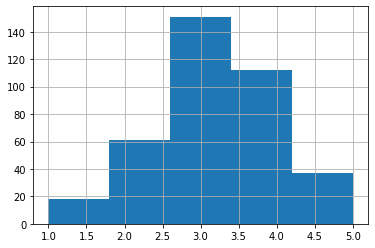

In [127]:
df.freetime.hist(bins=5)

Вывод: распределение близко к нормальному, однако сами значения таковы, что они скорее носят характер категориальных, нежели непрерывных числовых.

Посмотрим наглядно на наличие выбросов с помощью boxplot:

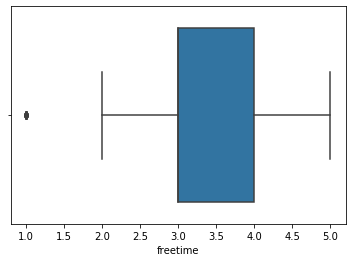

In [128]:
sns.boxplot(x='freetime', data=df)

Посмотрим на значения:

In [129]:
df.freetime.value_counts()

3.0    151
4.0    112
2.0     61
5.0     37
1.0     18
Name: freetime, dtype: int64

Все значения укладываются в логику описания переменной. Считаем, что выбросов нет.

Заменим пропущенные значения наиболее часто встречающимся значением 3:

In [130]:
df.freetime = df.freetime.fillna(3)

#### Выводы:
1. Не  все данные freetime заполнены;
2. Всего 5 вариантов значений: 1, 2, 3, 4, 5;
3. Данные с 3 встречаются значительно чаще;
4. Это номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением 3.

---
#### 26. goout
Описание: проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

Проверим пропуски:

In [131]:
df.goout.isna().sum()

7

Не все данные заполнены.

Посмотрим на распределение значений:

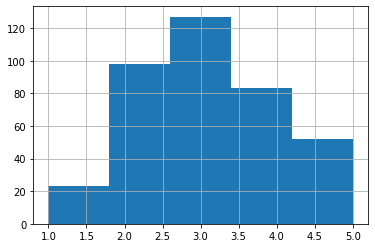

In [132]:
df.goout.hist(bins=5)

Вывод: распределение близко к нормальному, однако сами значения таковы, что они скорее носят характер категориальных, нежели непрерывных числовых.

Посмотрим наглядно на наличие выбросов с помощью boxplot:

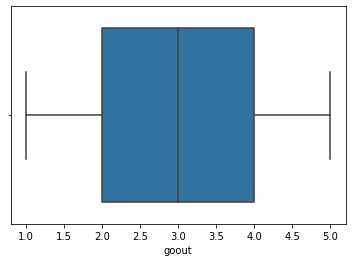

In [133]:
sns.boxplot(x='goout', data=df)

Посмотрим на значения:

In [134]:
df.goout.value_counts()

3.0    127
2.0     98
4.0     83
5.0     52
1.0     23
Name: goout, dtype: int64

Все значения укладываются в логику описания переменной. Считаем, что выбросов нет.

Заменим пропущенные значения наиболее часто встречающимся значением 3:

In [135]:
df.goout = df.goout.fillna(3)

#### Выводы:
1. Не  все данные goout заполнены;
2. Всего 5 вариантов значений: 1, 2, 3, 4, 5;
3. Данные с 3 встречаются значительно чаще;
4. Это номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением 3.

---
#### 27. health
Описание: текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

Проверим пропуски:

In [136]:
df.health.isna().sum()

15

Не все данные заполнены.

Посмотрим на распределение значений:

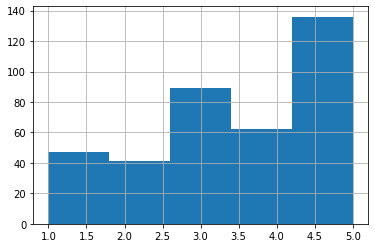

In [137]:
df.health.hist(bins=5)

Вывод: распределение смещено в сторону более высоких значений, однако сами значения таковы, что они скорее носят характер категориальных, нежели непрерывных числовых.

Посмотрим наглядно на наличие выбросов с помощью boxplot:

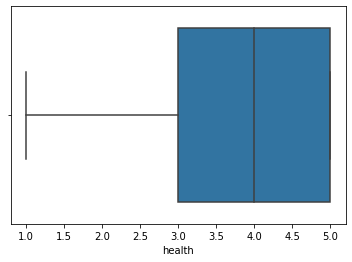

In [138]:
sns.boxplot(x='health', data=df)

Посмотрим на значения:

In [139]:
df.health.value_counts()

5.0    136
3.0     89
4.0     62
1.0     47
2.0     41
Name: health, dtype: int64

Все значения укладываются в логику описания переменной. Считаем, что выбросов нет.

Заменим пропущенные значения наиболее часто встречающимся значением 5:

In [140]:
df.health = df.health.fillna(5)

#### Выводы:
1. Не  все данные health заполнены;
2. Всего 5 вариантов значений: 1, 2, 3, 4, 5;
3. Данные с 5 встречаются значительно чаще;
4. Это номинативный признак;
5. Выбросов нет;
6. Пропущенные данные лучше заменить наиболее часто встречающимся значением 5.

---
#### 28. absences
Описание: количество пропущенных занятий

Проверим пропуски:

In [141]:
df.absences.isna().sum()

12

Не все данные заполнены.

Посмотрим на распределение значений:

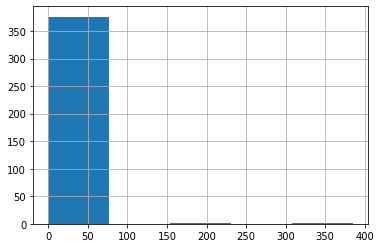

In [142]:
df.absences.hist(bins=5)

Вывод: имеются явные выбросы.

Посмотрим на значения:

In [143]:
df.absences.value_counts()

0.0      110
2.0       60
4.0       51
6.0       31
8.0       20
10.0      17
12.0      12
14.0      11
3.0        8
16.0       7
7.0        6
18.0       5
5.0        5
20.0       4
22.0       3
9.0        3
1.0        3
15.0       2
13.0       2
11.0       2
25.0       1
54.0       1
385.0      1
26.0       1
56.0       1
24.0       1
212.0      1
21.0       1
75.0       1
30.0       1
19.0       1
38.0       1
40.0       1
23.0       1
17.0       1
28.0       1
Name: absences, dtype: int64

В логику описания переменной absences не укладываются 2 строки данных со значениями 385 и 212, так как учебных дней меньше. Удалим эти данные:

In [144]:
df = df[df.absences != 385]
df = df[df.absences != 212]

Заменим пропущенные значения наиболее часто встречающимся значением 0:

In [145]:
df.absences = df.absences.fillna(0)

#### Выводы:
1. Не  все данные absences заполнены;
2. Данные с 0 встречаются значительно чаще;
3. Это числовой дискретный признак;
4. Имелось 2 выброса на значениях 212 и 385;
5. Пропущенные данные лучше заменить наиболее часто встречающимся значением 0.

---
#### 29. score - целевая переменная
Описание: баллы по госэкзамену по математике

Проверим на отсутствующие даннные:

In [146]:
df.score.isna().sum()

6

Имеются отсутствующие данные. Удалим соответствующие строки:

In [147]:
df.dropna(subset=['score'], inplace=True)

Посмотрим на распределение:

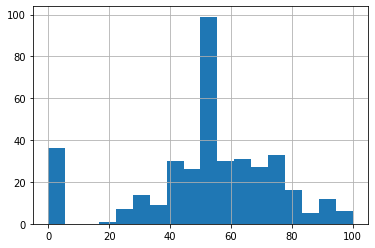

In [148]:
df.score.hist(bins=df.score.nunique())

Вывод: можно было бы считать, что значения целевой переменной распределены практически нормально, но есть группа значений на 0, которые укладываются в логику переменной, означают, что экзамен не был сдан, и не могут считаться выбросами. Эту особенность нужно учесть на этапе моделирования.

In [149]:
df.score.value_counts()

50.0     53
55.0     46
0.0      36
75.0     33
65.0     31
40.0     30
60.0     30
70.0     27
45.0     26
80.0     16
30.0     14
90.0     12
35.0      9
25.0      7
95.0      5
85.0      5
100.0     1
20.0      1
Name: score, dtype: int64

Вывод: из картины значений, которые может принимать целевая переменная делаем вывод, что она носит скорее дискретный характер и для моделирования больше подойдут алгоритмы классификации, нежели алгоритмы регрессии.

---
#### Анализ взаимозависимости переменных

Посмотрим на взаимную корреляцию переменных с помощью sns.heatmap

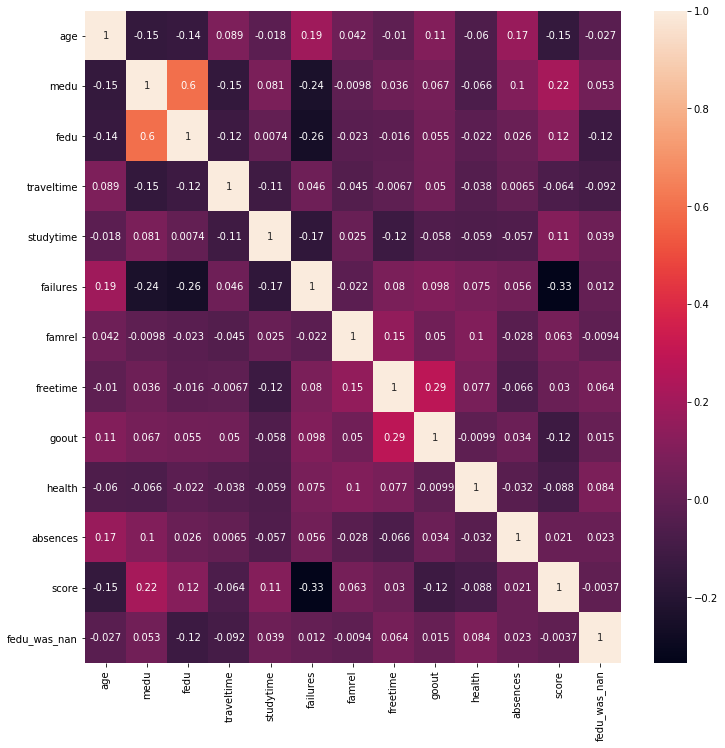

In [150]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(), annot=True)

Вывод: в датасете нет сильно скоррелированных данных. Наибольшая корреляция наблюдается между переменными medu и fedu, что означает по видимому, для образования семьи зачастую партнеры подбираются из среды с одинаковым уровнем образования.

Проверим, есть ли статистическая разница в распределении оценок по номинативным признакам, с помощью теста Стьюдента. Проверим нулевую гипотезу о том, что распределения оценок батончиков по различным параметрам неразличимы:

In [151]:
def get_stat_dif(column):
    cols = df.loc[:, column].value_counts().index[:10]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'],
                     df.loc[df.loc[:, column] == comb[1], 'score'],
                     nan_policy='omit').pvalue \
                     <= 0.05/len(combinations_all):  # Учли поправку Бонферони
            print(f'Обнаружена статистически значимая колонка: {column}')
            break

In [152]:
for col in df.columns[:-1]:
    get_stat_dif(col)

Обнаружена статистически значимая колонка: sex
Обнаружена статистически значимая колонка: address
Обнаружена статистически значимая колонка: medu
Обнаружена статистически значимая колонка: mjob
Обнаружена статистически значимая колонка: failures
Обнаружена статистически значимая колонка: higher
Обнаружена статистически значимая колонка: romantic
Обнаружена статистически значимая колонка: absences
Обнаружена статистически значимая колонка: score


/home/alexey300479/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3584: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/home/alexey300479/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Как мы видим, серьёзно отличаются восемь параметров: sex, address, medu, mjob, failures, higher, romantic и absences. Оставим эти переменные в датасете для дальнейшего построения модели.

In [153]:
cols = [
    'sex',
    'address',
    'medu',
    'mjob',
    'failures',
    'higher',
    'romantic',
    'absences',
    'score'
]
df_for_model = df.loc[:, cols]
df_for_model.head()

,sex,address,medu,mjob,failures,higher,romantic,absences,score
0,F,U,4.0,at_home,0.0,yes,no,6.0,30.0
1,F,U,1.0,at_home,0.0,yes,no,4.0,30.0
2,F,U,1.0,at_home,3.0,yes,no,10.0,50.0
3,F,U,4.0,health,0.0,yes,yes,2.0,75.0
4,F,U,3.0,other,0.0,yes,no,4.0,50.0


 ## Дополнительный анализ

Используя интерактивные графические инструменты plotly проанализируем данные в разрезах пола родителей и пола учащихся.

---
### Распределение учащихся по школам и полу (school, sex)

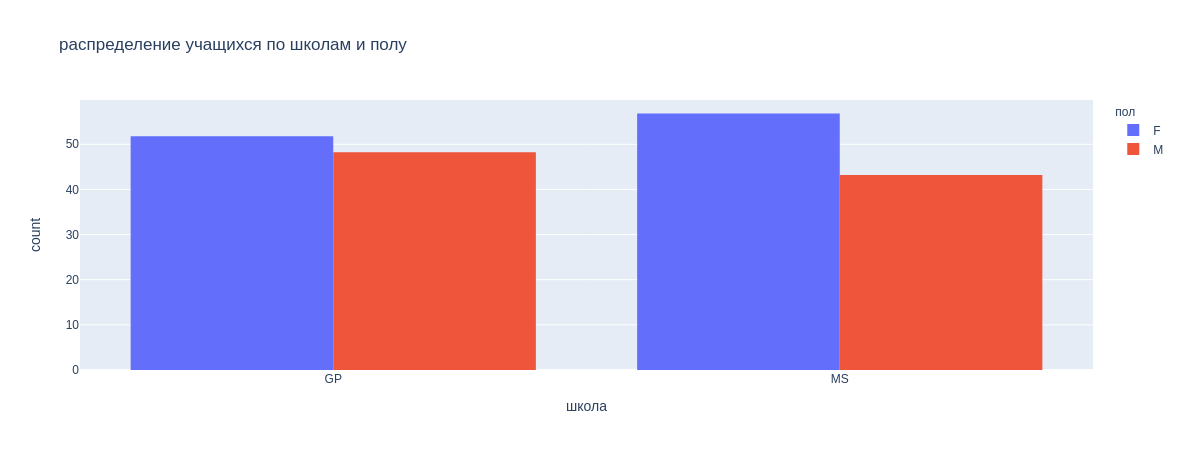

In [161]:
labels = {
    'count': 'доля учащихся, %',
    'school': 'школа',
    'sex': 'пол',
}

fig = px.histogram(df, x='school', color='sex', labels=labels,
                   barmode='group', barnorm='percent',
                   title='распределение учащихся по школам и полу')
fig.show()

### Выводы:
1. В обеих школах учащихся женского пола больше, чем мужского;
2. В школе MS количество учащихся женского пола преобладает над количеством учащихся мужского пола сильнее, чем в школе GP.

---
### Распределение учащихся по школам и возрасту (school, age)

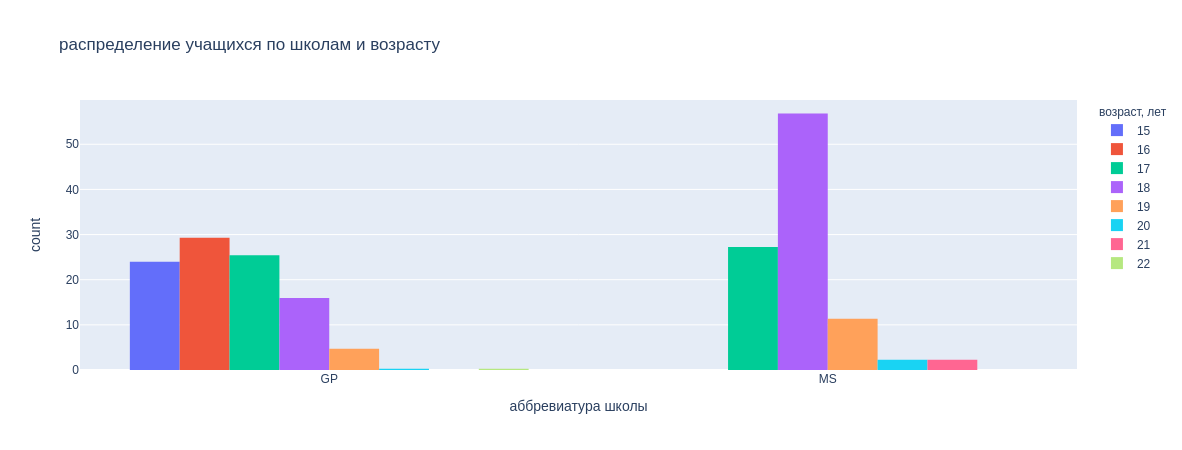

In [157]:
labels = {
    'count': 'доля учащихся, %',
    'school': 'аббревиатура школы',
    'age': 'возраст, лет'
}

category_orders = {
    'age': [15, 16, 17, 18, 19, 20, 21, 22]
}

fig = px.histogram(df, x='school', color='age', labels=labels,
                   category_orders=category_orders, barmode='group',
                   barnorm='percent',
                   title='распределение учащихся по школам и возрасту')
fig.show()

###  Выводы:
1. Преобладающее количество учащихся в школе GP находится в возрасте 15-18 лет, а в школе MS - в возрасте 17-19 лет;
2. В школе MS количество учащихся с возрастом 18 лет составляет более половины всех учащихся. Это может быть вызвано как образовательной программой или политикой самой школы, так и несбалансированностью датасета в следствие его некачественного формирования.

---
### Распределение учащихся по школам и адресу (school, address)

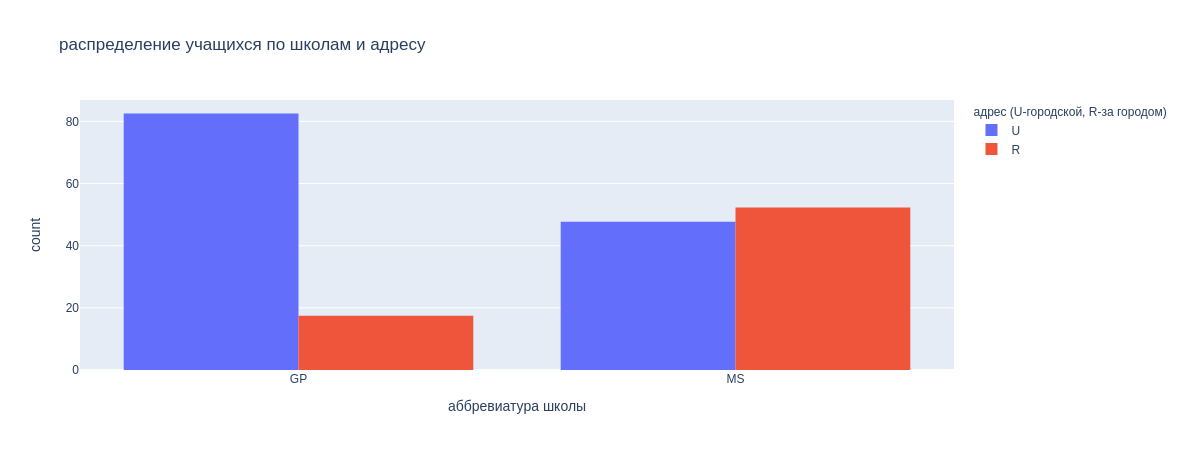

In [162]:
labels = {
    'count': 'доля учащихся, %',
    'school': 'аббревиатура школы',
    'address': 'адрес (U-городской, R-за городом)'
}

fig = px.histogram(df, x='school', color='address', labels=labels,
                   barmode='group', barnorm='percent',
                   title='распределение учащихся по школам и адресу')
fig.show()

###  Выводы:
1. Преобладающее количество учащихся в школе GP проживает в городе, в то время как в школе MS доля учащихся, проживающих за городом несколько выше доли учащихся, проживающих в городе;
2.  На основе этих данных, а также того факта, что данных об учащихся в школе GP значительно больше, чем данных об учащихся в школе MS следует, что либо датасет по школе MS составлен недостаточно качественно, либо школа MS находится в пригороде.

---
### Распределение учащихся по школам и размеру семьи (school, famsize)

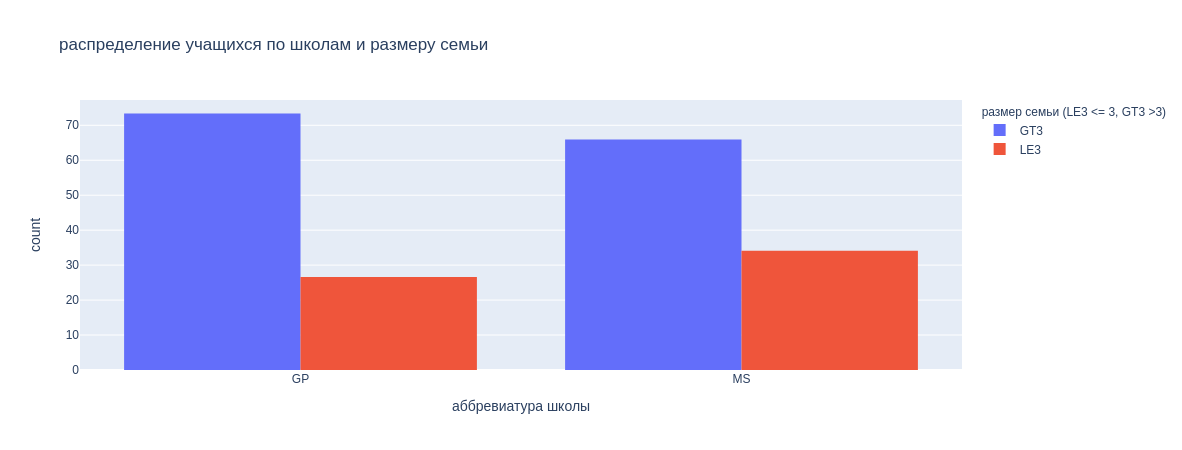

In [163]:
labels = {
    'count': 'доля учащихся, %',
    'school': 'аббревиатура школы',
    'famsize': 'размер семьи (LE3 <= 3, GT3 >3)'
}

fig = px.histogram(df, x='school', color='famsize', labels=labels,
                   barmode='group', barnorm='percent',
                   title='распределение учащихся по школам и размеру семьи')
fig.show()

###  Выводы:
1. Преобладающее количество учащихся в обеих школах из семей с количеством членов более 3;
2. Соотношение количества учащихся из семей с разным размером практически одинаковы для обеих школ, что говорит об общей тенденции родителей иметь 2 и более детей в целом по стране, в которой расположены школы.

---
### Распределение уровня образования родителей (medu, fedu)

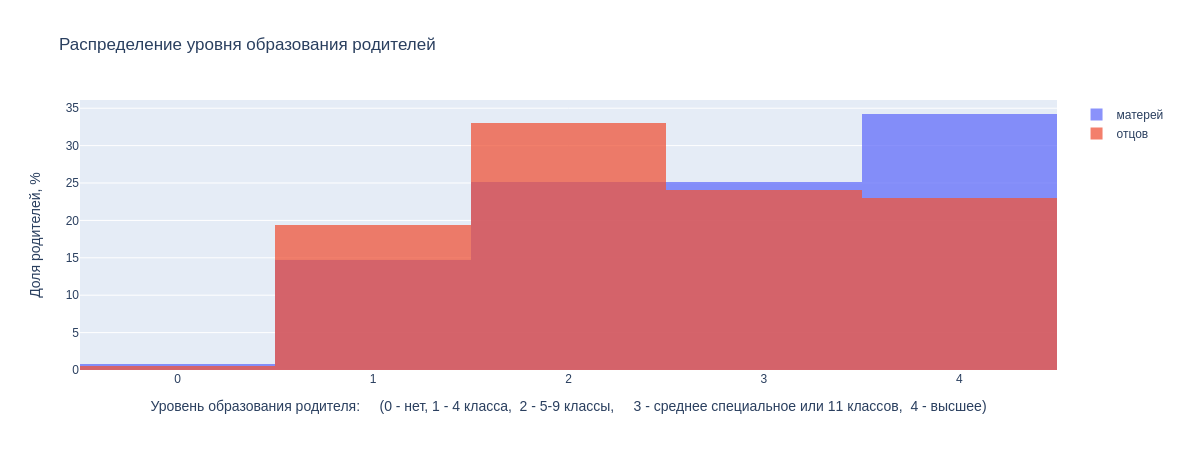

In [165]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['medu'], histnorm='percent', name='матерей'))
fig.add_trace(go.Histogram(x=df['fedu'], histnorm='percent', name='отцов'))

# Overlay both histograms
fig.update_layout(
    barmode='overlay',
    title_text='Распределение уровня образования родителей',
    xaxis_title_text='''
    Уровень образования родителя:
    (0 - нет, 1 - 4 класса,  2 - 5-9 классы,
    3 - среднее специальное или 11 классов,  4 - высшее)
    ''',
    yaxis_title_text='Доля родителей, %',
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

### Выводы:
1. Распределение уровня образования для матерей и отцов отличаются;
2. Данные, вошедшие в датасет показывают, что уровень образования матерей значительно выше (максимум на высшем образовании у матерей против максимума на 5-9 классах у отцов);
3. Доли родителей со средним специальным образованием у отцов и матерей практически не отличаются;
4. Случаи отсутствия образования крайне редки. Причина скорее всего кроется в том, что при отсутствии образования у родителей ребенок будет получать образование с меньшей вероятностью, а значит записи по нему не будет в представленном к анализу датасете.

---
### Распределение мест работы родителей (mjob, fjob)

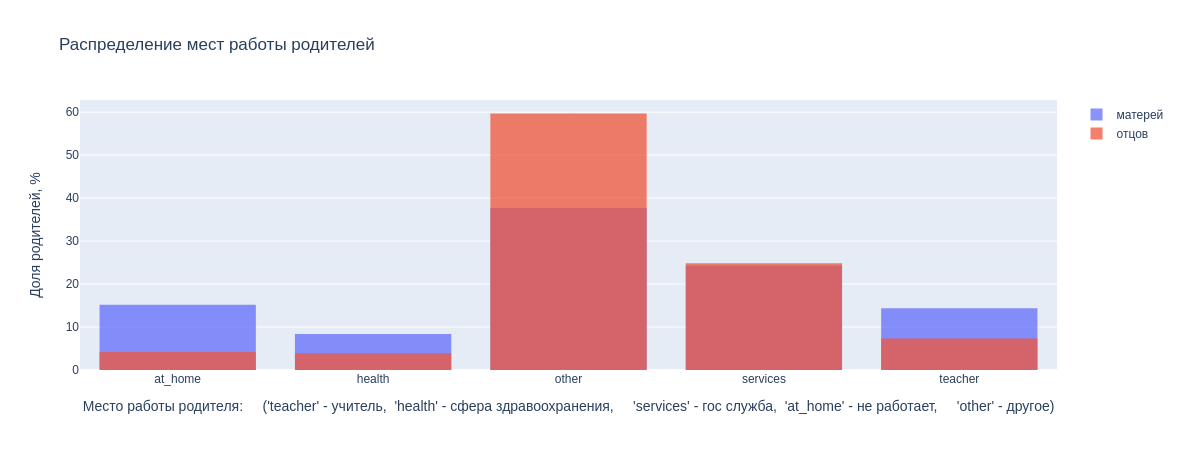

In [167]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df['mjob'], histnorm='percent', name='матерей'))
fig.add_trace(go.Histogram(x=df['fjob'], histnorm='percent', name='отцов'))

# Overlay both histograms
fig.update_layout(
    barmode='overlay',
    title_text='Распределение мест работы родителей',
    xaxis_title_text='''
    Место работы родителя:
    ('teacher' - учитель,  'health' - сфера здравоохранения,
    'services' - гос служба,  'at_home' - не работает,
    'other' - другое)
    ''',
    yaxis_title_text='Доля родителей, %',
)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

### Выводы:
1. Распределение мест работы матерей и отцов отличаются;
2. Доля, приходящаяся на матерей преобладает в категориях "не работает", "сфера здравоохранения", "учитель";
3. Доля, приходящаяся на отцов преобладает в категории "other";
4. Доли матерей и отцов, работающих на государственной службе практически совпадают.

---
### Распределение учащихся по школам и причине выбора (school, reason)

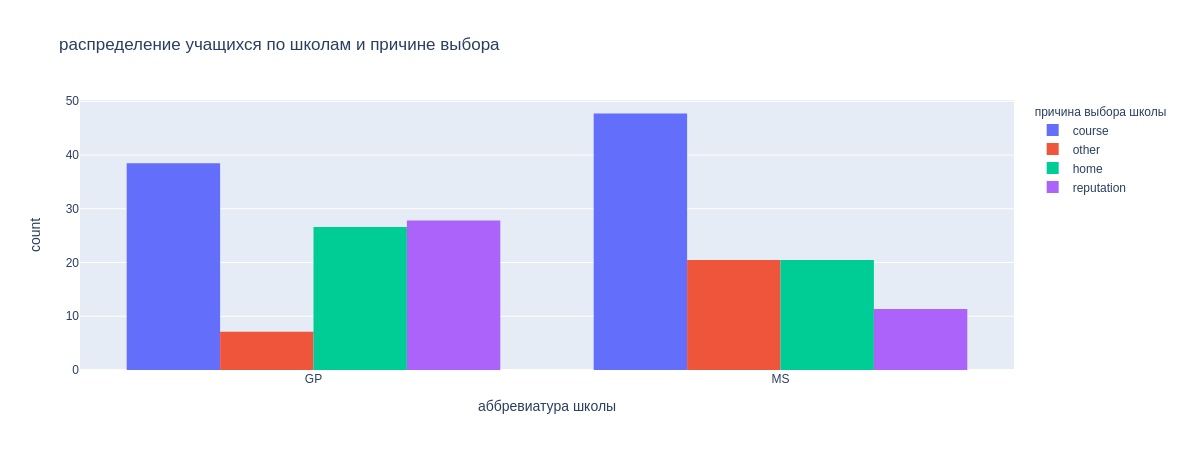

In [169]:
labels = {
    'count': 'доля учащихся, %',
    'school': 'аббревиатура школы',
    'reason': 'причина выбора школы'
}

fig = px.histogram(df, x='school', color='reason', labels=labels,
                   barmode='group', barnorm='percent',
                   title='распределение учащихся по школам и причине выбора')
fig.show()

###  Выводы:
1. Для обеих школ преобладающей причиной выбора является образовательная программа;
2. Для родителей учащихся школы GP при выборе школы репутация имела большее значение, чем для родителей учащихся школы MS.

---
### Распределение учащихся по полу и романтическим отношениям (sex, romantic)

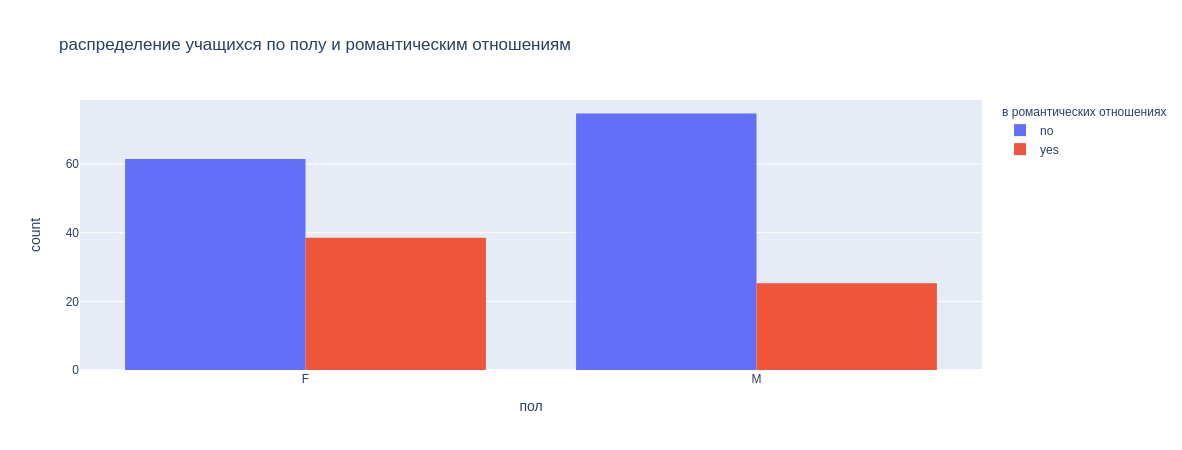

In [173]:
labels = {
    'count': 'доля учащихся, %',
    'sex': 'пол',
    'romantic': 'в романтических отношениях'
}

fig = px.histogram(df, x='sex', color='romantic', labels=labels,
                   barmode='group', barnorm='percent',
                   title='''
                   распределение учащихся по полу и романтичеcким отношениям
                   ''')
fig.show()

### Выводы:
1. Преобладающее количество учащихся как женского, так и мужского пола не состоит в роматических отношениях;
2. Среди учащихся мужского пола доля учащихся, находящихся в роматических отношениях значительно меньше, чем среди учащихся женского пола.

---
### Распределение учащихся по романтическим отношениям и оценке по математике (romantic, score). Проще говоря, мешает ли любовь учебе :)?

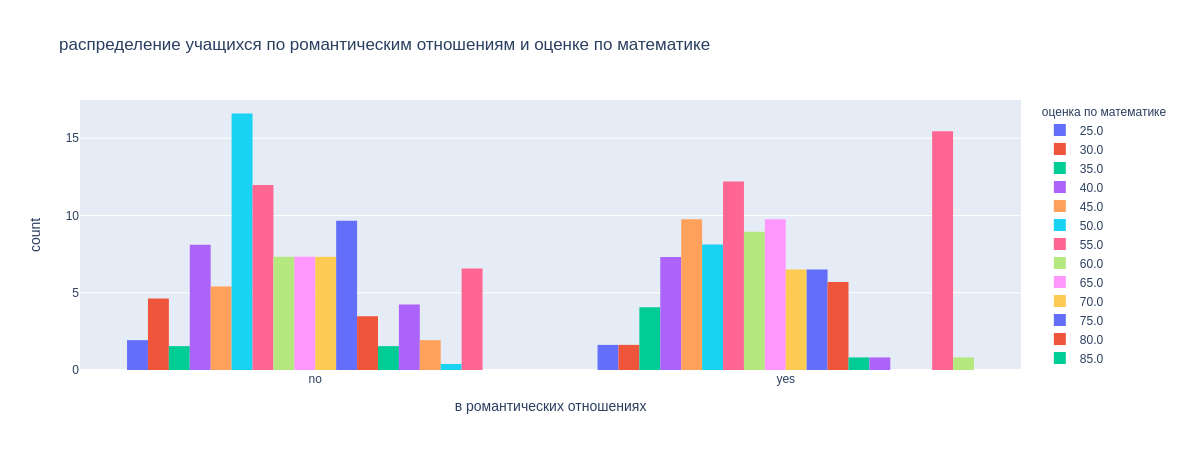

15:80: E501 line too long (92 > 79 characters)
INFO:pycodestyle:15:80: E501 line too long (92 > 79 characters)


In [176]:
labels = {
    'count': 'доля учащихся, %',
    'romantic': 'в романтических отношениях',
    'score': 'оценка по математике'
}

category_orders = {
    'score': list(range(25, 105, 5))
}

fig = px.histogram(df, x='romantic', color='score', labels=labels,
                   category_orders=category_orders, barmode='group',
                   barnorm='percent',
                   title='''
                   распределение учащихся по романтическим отношениям и оценке по математике
                   ''')
fig.show()

###  Выводы:
1. Доля учащихся не сдавших тест среди учащихся, находящихся в романтических отношениях значительно выше, чем среди учащихся не находящихся в таковых;
2. К сожалению для большинства учащихся любовь мешает учебе, по видимому смещая приоритеты распределения времени между занятиями и встречами.

### Проверим этот вывод проанализировав распределение учащихся по романтическим отношениям и количеству пропусков:

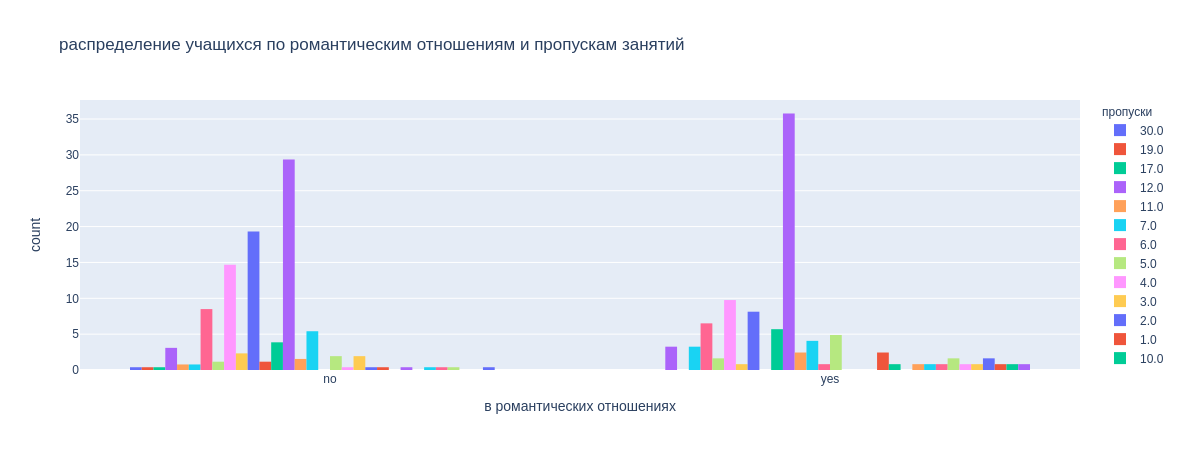

15:80: E501 line too long (89 > 79 characters)
INFO:pycodestyle:15:80: E501 line too long (89 > 79 characters)


In [181]:
labels = {
    'count': 'доля учащихся, %',
    'romantic': 'в романтических отношениях',
    'absences': 'пропуски'
}

category_orders = {
    'absences': list(df['absences'].value_counts().values)
}

fig = px.histogram(df, x='romantic', color='absences', labels=labels,
                   category_orders=category_orders, barmode='group',
                   barnorm='percent',
                   title='''
                   распределение учащихся по романтическим отношениям и пропускам занятий
                   ''')
fig.show()

### Выводы:
1. Как ни странно, доля учащихся не пропустивших ни одного занятия значительно выше среди учащихся, находящихся в романтических отношениях;
2. Учитывая результаты анализа распределения по романтическим отношениям и оценке по математике можно сделать вывод, что учащиеся пребывают в романтических отношениях с одноклассниками (занятия не пропускают, но на уроках уделяют больше внимания друг другу нежели преподавателю и занятиям).

# :)

---
## Итоговые выводы:
1. Для построения модели предсказания оценки лучше выбрать признаки:
* sex - пол,
* address - адрес,
* medu - уровень образования матери,
* mjob - место работы матери,
* failures - количество внеучебных неудач,
* higher - желание получить высшее образование,
* romantic - пребывание в романтических отношениях,
* absences - количество пропусков;
2. Данные несбалансированы по полу, требуется применение одного из методов балансировки перед обучением модели;
3. Врядли стоит ожидать высокой точности модели, в виду отсутствия признаков, достаточно сильно скоррелированных с целевой переменной.